In [1]:
#!pip install folium

In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname='c:\windows/fonts/malgun.ttf').get_name()
rc('font',family=font_name)

df = pd.read_csv('camping_loc.csv', encoding='euc-kr')
df1=df.filter(['캠핑(야영)장명','위도','경도','주소'])

In [2]:
map_osm = folium.Map(location=[36.566651, 126.978428], zoom_start=9)

In [3]:
for i in df1.index:
    name = df1.loc[i,'캠핑(야영)장명']
    lat = df1.loc[i,'위도']
    lng = df1.loc[i,'경도']
    marker = folium.Marker([lat,lng], popup=name)
    marker.add_to(map_osm)
map_osm

In [4]:
df2=df1.filter(['주소'])
df2.isna().sum()
df2.dropna(inplace=True)

df2['addr cnt'] = df2['주소'].str.find(' ').astype(int)
df3= df2.copy()

for i in df3.index:
    addr= df3.loc[i,'주소']
    idx= df3.loc[i,'addr cnt']
    city= addr[:idx]
    df3.loc[i,'시도'] = city
df3
df4= df3.filter(['시도'])
df4.value_counts()

시도        
경기도           368
강원도           367
경상북도          196
경기            166
경상남도          154
충청남도          133
충청북도          110
강원            108
전라남도           83
전라북도           82
경남             72
충남             56
전남             53
경북             52
충북             51
제주특별자치도        40
전북             34
인천광역시          29
인천             28
울산광역시          14
부산광역시          11
대구광역시           9
인천시             7
세종특별자치시         4
서울              4
울산              4
포천시             4
대전광역시           4
서울특별시           3
김천시             3
대구              3
부산              3
광주              2
광주광역시           2
대전              2
대구시             2
                2
제주도             2
제주시             2
청도군             2
018-66/서울시      1
가평군             1
각북면             1
파주시             1
충주시             1
강화군             1
청송군             1
대청로424번길        1
부산시             1
음성군             1
울산시             1
공주시             1
영주시             1
연천군             1
군위군             1

In [5]:
df5=df4.copy()
change = [(df4['시도'] == '경기')|(df4['시도'] == '가평군')|(df4['시도'] == '파주시')|(df4['시도'] == '연천군'),
          (df4['시도'] == '경남'),
          (df4['시도'] == '경북')|(df4['시도'] == '청도군')|(df4['시도'] == '포항시')|(df4['시도'] == '각북면')|(df4['시도'] == '군위군')|(df4['시도'] == '영주시')|(df4['시도'] == '청송군'),
          (df4['시도'] == '전남'),
          (df4['시도'] == '전북'),
          (df4['시도'] == '충남')|(df4['시도'] == '공주시'),
          (df4['시도'] == '충북')|(df4['시도'] == '음성군')|(df4['시도'] == '충주시'),
          (df4['시도'] == '대구'),
          (df4['시도'] == '울산')|(df4['시도'] == '울산시'),
          (df4['시도'] == '부산')|(df4['시도'] == '부산시'),
          (df4['시도'] == '제주') | (df4['시도'] == '제주시') | (df4['시도'] == '제주도'),
          (df4['시도'] == '강원')|(df4['시도'] == '상서면')|(df4['시도'] == '화천군'),
          (df4['시도'] == '인천')|(df4['시도'] == '인천시')|(df4['시도'] == '강화군'),
          (df4['시도'] == '서울')| (df4['시도'] == '018-66/서울시'),
          (df4['시도'] == '대구시'),
          (df4['시도'] == '대전')|(df4['시도'] == '대청로424번길'),
          (df4['시도'] == '포천시'),
          (df4['시도'] == '김천시'),
           (df4['시도'] == '광주'),
           (df4['시도'] == '')
            ]
name =['경기도','경상남도','경상북도','전라남도',
       '전라북도','충청남도','충청북도','대구광역시',
       '울산광역시','부산광역시','제주특별자치도','강원도',
       '인천광역시','서울특별시','대구광역시','대전광역시',
       '경기도','경상북도','광주광역시','주소파악X']
df5['시도']=np.select(change,name,default=df5['시도'])
df5.value_counts()


시도     
경기도        541
강원도        477
경상북도       258
경상남도       226
충청남도       190
충청북도       163
전라남도       136
전라북도       116
인천광역시       65
제주특별자치도     44
울산광역시       19
부산광역시       15
대구광역시       14
서울특별시        8
대전광역시        7
세종특별자치시      4
광주광역시        4
주소파악X        2
dtype: int64

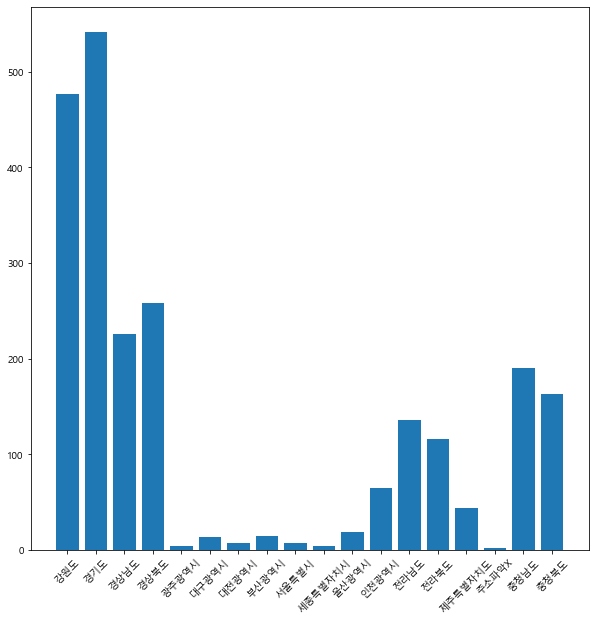

In [6]:
x= np.arange(len(df5['시도'].unique()))
plt.figure(figsize=(10,10))
a=df5['시도'].unique()
plt.bar(x,df5.value_counts().sort_index())
plt.xticks(x,sorted(a),rotation=45)
plt.show()

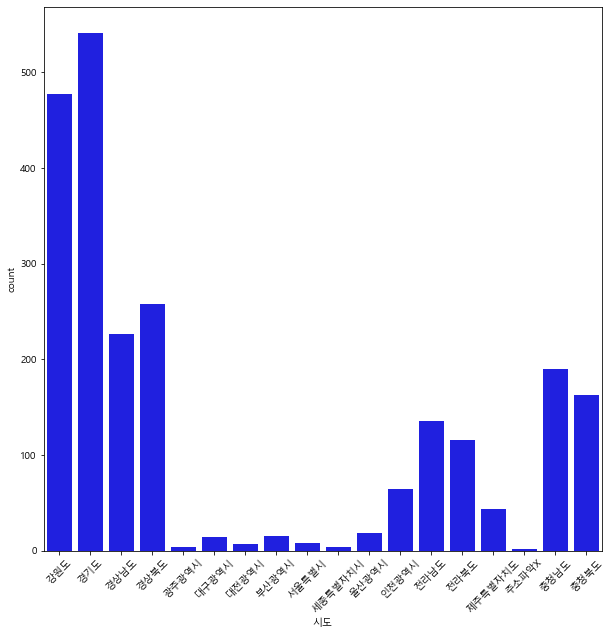

In [7]:
plt.figure(figsize=(10,10))
sb.countplot(data=df5.sort_values(by=['시도'],ascending=[True]),x='시도',color='b')
plt.xticks(rotation=45)   
plt.show()